# Implementation of Bentley-Ottman Algortihm for Line Segment Intersections

A Report for CS F364: Design and Analysis of Algorithm

Authors

- Aditya Chopra | 2019A7PS0178H
- Omkar Pitale | 2019A7PS0083H
- Vedansh Srivastava | 2019A7PS0323H


## Implementation

Please find the details as attached in the doxygen documentation.

## Testing

We tested our code with several different test case generation strategies, and with several different sizes for number of intersections and the number of segments. The results for the same has been displayed below. 

Tests Generated:
1. Simple Grid
2. Sparse Intersections
3. Parallel Slanted
4. Drunk Grid
5. Random
6. Edge Cases and Degeneracies

### Simple Grid

![simple-grid](plots/grid-15-20.png)

### Sparse intersections

![sparse](plots/sparse-64.png)

### Parallel Slanted

> Note: We don't want to report any intersections in this case

|                  Zoomed Out                  |                         Zoomed In                          |
| :------------------------------------------: | :--------------------------------------------------------: |
| ![parallel](plots/slanted-10000.png) | ![parallel-zoomer](plots/slanted-10000-zoomed.png) |


### Drunk Grid

![drunk-grid](plots/drunk-grid-400.png)

### Random

![random](plots/random-8.png)

### Degenerate Cases

1. T-Shape: Endpoint of only one segment is the intersection point
   Such intersections are not currently detected by our implementation

2. Overlapping Line Segments:
   If two line segments are placed on top of each other, separated by a small offset such that they still intersect, then such set of points can not be detected in our implementation

3. Two almost horizontal lines intersecting
   We detect such lines only upto a certain epsilon of difference ($10^{-9}$). After which, they are detected as two separate intersections. This eps parameter can be controlled within the algorithm.

|             T-shape base              |           T-shape degenerate           |
| :-----------------------------------: | :------------------------------------: |
| ![base](plots/degen_base.png) | ![degen](plots/degen_cond.png) |

| Almost horizontal but difference more than epsilon | Almost Horizontal Lines with difference less than epsilon |
| :------------------------------------------------: | :-------------------------------------------------------: |
|   ![parallel](plots/hori-intersect.png)    |     ![parallel-zoomer](plots/degen-hori.png)      |


# Large Example

|             1e6 intersections             |                     zoomed                      |
| :---------------------------------------: | :---------------------------------------------: |
| ![base](plots/grid-1000-1000.png) | ![degen](plots/grid-1000-1000-zoom.png) |


## Benchmarking

After verifying the correctness of our code we run benchamrking on the source, and analyse the running time using Google Benchmark Suite

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [58]:
bm = pd.read_csv('bm_linear_grid.csv')
bm["kn_lg_n"] = (bm["num_intersections"] + bm["num_segments"]) * np.log(bm["num_segments"])

bm.describe()

,wall_time,cpu_time,num_iter,m,n,num_segments,num_intersections,kn_lg_n
count,1.010000e+02,1.010000e+02,101.000000,101.000000,101.0,101.000000,1.010000e+02,1.010000e+02
mean,3.022762e+07,3.021814e+07,25.108911,15000.000000,100.0,15100.000000,1.500000e+06,1.460792e+07
std,8.287872e+06,8.275388e+06,7.484519,2930.017065,0.0,2930.017065,2.930017e+05,3.138251e+06
min,1.510940e+07,1.511000e+07,13.000000,10000.000000,100.0,10100.000000,1.000000e+06,9.313416e+06
25%,2.284460e+07,2.284362e+07,19.000000,12500.000000,100.0,12600.000000,1.250000e+06,1.192078e+07
50%,3.163660e+07,3.163558e+07,23.000000,15000.000000,100.0,15100.000000,1.500000e+06,1.457897e+07
75%,3.654884e+07,3.654543e+07,30.000000,17500.000000,100.0,17600.000000,1.750000e+06,1.727945e+07
max,4.759283e+07,4.758826e+07,60.000000,20000.000000,100.0,20100.000000,2.000000e+06,2.001611e+07


<AxesSubplot:xlabel='kn_lg_n', ylabel='cpu_time'>

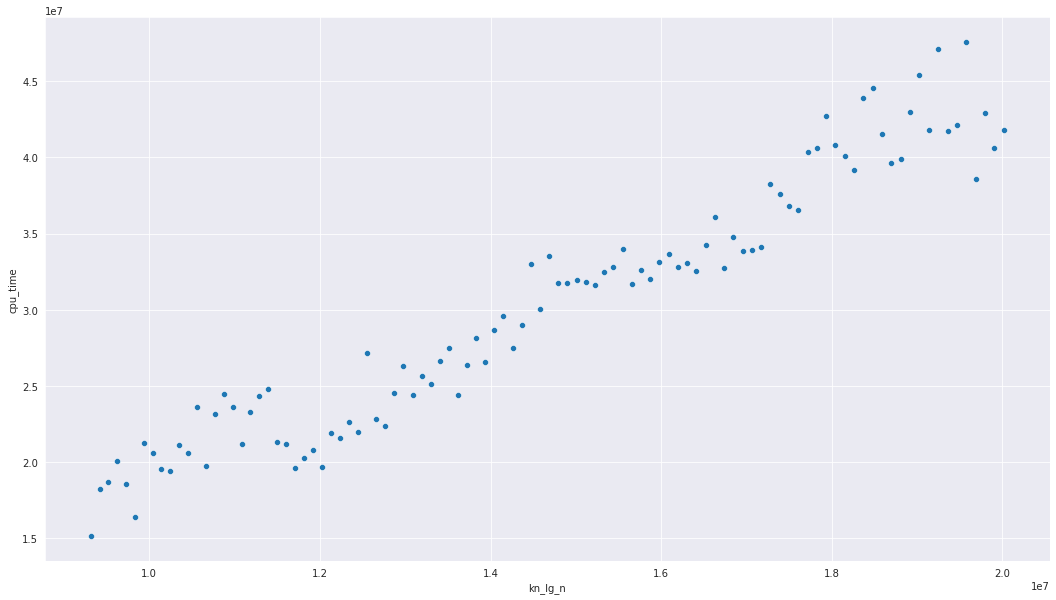

In [59]:
plt.figure(figsize=(18, 10))
sns.scatterplot(x=bm["kn_lg_n"], y=bm["cpu_time"])

### Analysis
We see a clear linear trend between the kn_lg_n term and the wall/cpu time term of the plot. The kn_lg_n term was computed as follows:

$$
 (k + n) \log n
$$

This empirically proves the relation:

$$
T(n, k) \in O((k + n) \log n)
$$

The same result was verified by the Google Benchmark tool as well.

## Profiling

Now that we have the results of the Benchmark, we analyse where our code takes the most time and what can be improved. We have the following Flame Graph. 


1. Clearly, the Red-Black tree data-structure is the bottle-neck
2. The implementation for `erase()` relies on the speed of `find()` which is considerably slow due to multiple indirections in our code, and the call-stack growing. Inlining the method could help improve the performance.
3. This is automatically done at a sufficiently high level of Optimizations (-O3) and makes our implementation quite fast but can not be recorded by the profiler.


![flame-graph](plots/flame-graph.png)